In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from researchlib.single_import import *

Max Input Length 50
Max Output Length 18


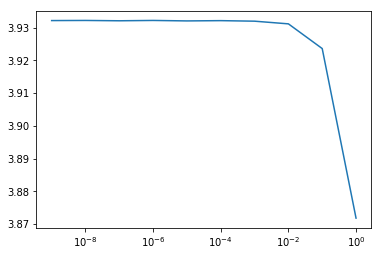

  Epochs    train_loss  
    1         3.9218    


    2         3.6299    


    3         3.2401    


    4         2.6721    


    5         2.3292    



In [4]:
import numpy as np
import tqdm
import torch
from torch import optim
from torch.utils.data import DataLoader
from torch.autograd import Variable
from torch.nn.utils import clip_grad_norm_
import sys

train_ds = CHDataset("data/convex_hull_50_test.txt")
train_dl = DataLoader(train_ds, num_workers=2, batch_size=1024) 
model = PointerNet("LSTM", True, 1, 2, 128, 0.0)
runner = Runner(model=model, train_loader=train_dl, loss_fn=PointerNetLoss(), optimizer='adam')
runner.find_lr(plot=True)
runner.fit(5, lr=1e-2)

In [5]:
model = runner.model

In [6]:
(a, b, c), (d, e) = next(iter(train_dl))
print(a.shape, b.shape, c.shape, d.shape, e.shape, e[0, 0])
out = model(a.cuda(),b.cuda(),c.cuda())

torch.Size([1024, 51, 2]) torch.Size([1024, 1]) torch.Size([1024, 19, 2]) torch.Size([1024, 19]) torch.Size([1024, 1]) tensor(13)


In [7]:
a = a[0]
print(a.shape)

torch.Size([51, 2])


In [8]:
d = d[0]

In [9]:
d

tensor([ 2, 36, 38, 48, 50,  7,  3,  5, 25, 18, 13,  2,  0,  0,  0,  0,  0,  0,
         0])

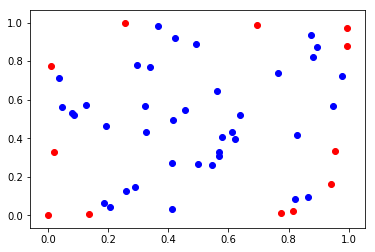

In [10]:
for i in range(len(a)):
    if i in d:
        plt.scatter(a[i][0], a[i][1], color='red')
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()

In [11]:
out = out[0]

In [12]:
c = out.argmax(-1)
print(c)

tensor([36, 36, 38, 48,  7,  7, 17, 25, 18, 13,  0,  0,  0,  0,  0,  0,  0,  0,
         0], device='cuda:0')


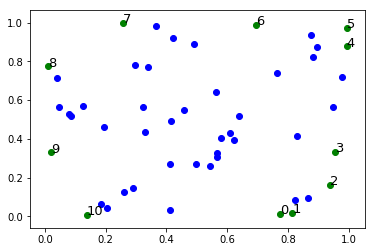

In [13]:
s = list(np.trim_zeros(d.numpy()))

for i in range(1, len(a)):
    if i in s:
        plt.scatter(a[i][0], a[i][1], color='green')
        plt.text(a[i][0], a[i][1], s.index(i), fontsize=13)
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()

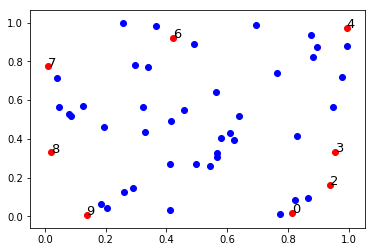

In [14]:
s = list(np.trim_zeros(c.cpu().numpy()))

for i in range(1, len(a)):
    if i in s:
        plt.scatter(a[i][0], a[i][1], color='red')
        plt.text(a[i][0], a[i][1], s.index(i), fontsize=13)
    else:
        plt.scatter(a[i][0], a[i][1], color='blue')
plt.show()